In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data and Basic Check

## Load Data

In [2]:
df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___Cost_Transparency__Beginning_2009_20250426.csv')

## Basic Check

In [3]:
df.head()

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
0,2016,4,Albany Memorial Hospital,194,1,Heart Failure,Minor,M,Medical,2,"8,375.41","8,375.41","3,585.05","3,585.05"
1,2016,4,Albany Memorial Hospital,194,2,Heart Failure,Moderate,M,Medical,40,"14,029.82","12,176.95","6,182.67","5,253.15"
2,2016,4,Albany Memorial Hospital,194,3,Heart Failure,Major,M,Medical,70,"23,921.77","20,229.81","11,149.49","9,068.10"
3,2016,4,Albany Memorial Hospital,194,4,Heart Failure,Extreme,M,Medical,12,"51,260.45","35,210.82","26,081.70","15,230.62"
4,2016,4,Albany Memorial Hospital,196,4,Cardiac Arrest,Extreme,M,Medical,1,"25,357.84","25,357.84","7,791.75","7,791.75"


### Drop Duplicated Columns

Based on the dataset documentation, the following pairs of columns are duplicative: 

* `Facility Id` and `Facility Name`
* `APR DRG Code` and `APR DRG Description`
* `APR Severity of Illness Code` and `APR Severity of Illness Description`
* `APR Medical Surgical Code` and `APR Medical Surgical Description`. 

To streamline the dataset and avoid redundancy, we decided to retain the coded columns and drop the corresponding descriptive columns.

In [4]:
columns_to_drop = [
    'Facility Name', 
    'APR Severity of Illness Description', 
    'APR DRG Description', 
    'APR Medical Surgical Description',
]

df = df.drop(columns=columns_to_drop)

Based on observations from the Data Wrangler tool, the `APR Severity of Illness` column contains 351 missing values. These missing values only account for less than 1% of the total records, removing them won't significantly reduce the dataset.

Additionally, we removed rows where the `APR Medical Surgical Code` is labeled as 'U', which stands for "Other". These records also represent less than 1% of the data.


In [5]:
df = df.dropna()
df = df[df['APR Medical Surgical Code'] != 'U']

### Check Data Type

In [6]:
print(df.dtypes)

Year                             int64
Facility Id                      int64
APR DRG Code                     int64
APR Severity of Illness Code     int64
APR Medical Surgical Code       object
Discharges                      object
Mean Charge                     object
Median Charge                   object
Mean Cost                       object
Median Cost                     object
dtype: object


Columns `Discharges`, `Mean Charge`, `Median Charge`, `Mean Cost`, and `Median Cost` are expected to be numeric. But currently they are stored as object data types. We decided to convert these columns to integer to support quantitative analysis.

In [7]:
for col in ['Discharges', 'Mean Charge', 'Median Charge', 'Mean Cost', 'Median Cost']:
    df[col] = df[col].replace('[\\$,]', '', regex=True).astype(float)

`APR DRG Code` and `Facility Id` should be categorical variable that represents disease description, not integer.

In [8]:
df['APR DRG Code'] = df['APR DRG Code'].astype('category')
df['Facility Id'] = df['Facility Id'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1192267 entries, 0 to 1192826
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   Year                          1192267 non-null  int64   
 1   Facility Id                   1192267 non-null  category
 2   APR DRG Code                  1192267 non-null  category
 3   APR Severity of Illness Code  1192267 non-null  int64   
 4   APR Medical Surgical Code     1192267 non-null  object  
 5   Discharges                    1192267 non-null  float64 
 6   Mean Charge                   1192267 non-null  float64 
 7   Median Charge                 1192267 non-null  float64 
 8   Mean Cost                     1192267 non-null  float64 
 9   Median Cost                   1192267 non-null  float64 
dtypes: category(2), float64(5), int64(2), object(1)
memory usage: 86.4+ MB


After basic data cleaning, all the columns are in expected data type of no NA values.

In [10]:
df.describe()

,Year,APR Severity of Illness Code,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
count,1.192267e+06,1.192267e+06,1.192267e+06,1.192267e+06,1.192267e+06,1.192267e+06,1.192267e+06
mean,2.013632e+03,2.342136e+00,2.043550e+01,5.358764e+04,4.911830e+04,1.938937e+04,1.762792e+04
std,3.414268e+00,1.036409e+00,8.122090e+01,9.371665e+04,8.881965e+04,3.493325e+04,3.300617e+04
min,2.009000e+03,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00
25%,2.011000e+03,1.000000e+00,2.000000e+00,1.487500e+04,1.346656e+04,5.855305e+03,5.219980e+03
50%,2.013000e+03,2.000000e+00,5.000000e+00,2.859500e+04,2.576186e+04,1.054900e+04,9.358980e+03
75%,2.016000e+03,3.000000e+00,1.500000e+01,5.746721e+04,5.195218e+04,2.076885e+04,1.861554e+04
max,2.021000e+03,4.000000e+00,6.938000e+03,7.456979e+06,7.456979e+06,7.683086e+06,7.683086e+06


Based on observation from statistic description table, there is no obvious error in the data.

## Export Data

In [11]:
df.to_csv('cleaned_hospital.csv', index=False)


# Visualization

## Load Data

In [12]:
df = pd.read_csv('cleaned_hospital.csv')

## Plotting Outcome

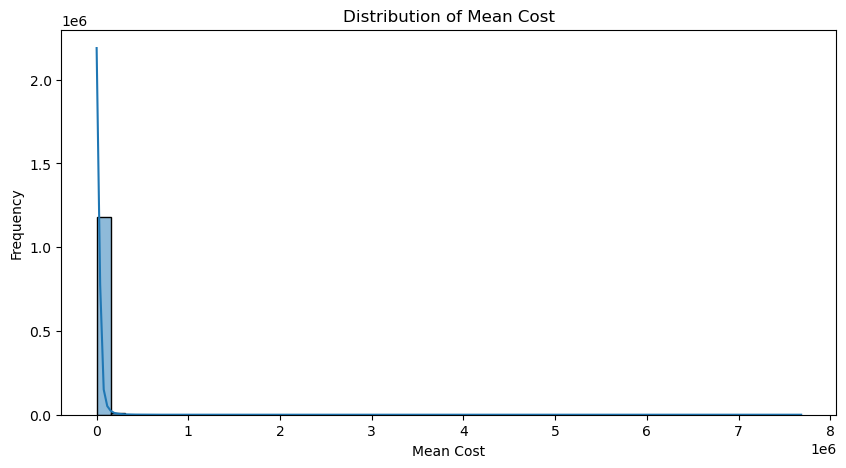

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Mean Cost'], bins=50, kde=True)
plt.title('Distribution of Mean Cost')
plt.xlabel('Mean Cost')
plt.ylabel('Frequency')
plt.show()

### Distribution of Mean Cost

- The distribution of Mean Cost is **highly right-skewed**, with most discharges associated with low to moderate costs.

- A small number of discharges have **significantly higher costs**, likely due to complex medical procedures or severe illnesses, which aligns with clinical expectations.

- These high-cost outliers could negatively impact model performance. To address this, we applied a **log transformation** to the Mean Cost to stabilize variance, reduce skewness, and improve model robustness.

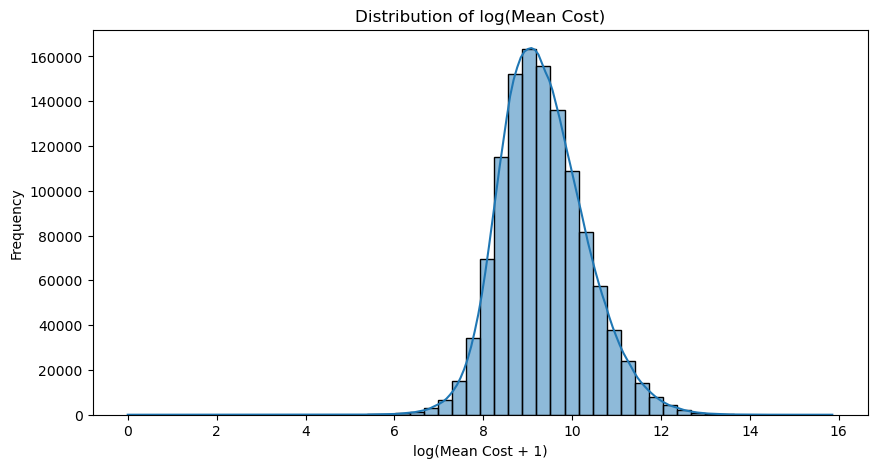

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df['Mean Cost']), bins=50, kde=True)
plt.title('Distribution of log(Mean Cost)')
plt.xlabel('log(Mean Cost + 1)')
plt.ylabel('Frequency')
plt.show()

### High Cost VS Low Cost

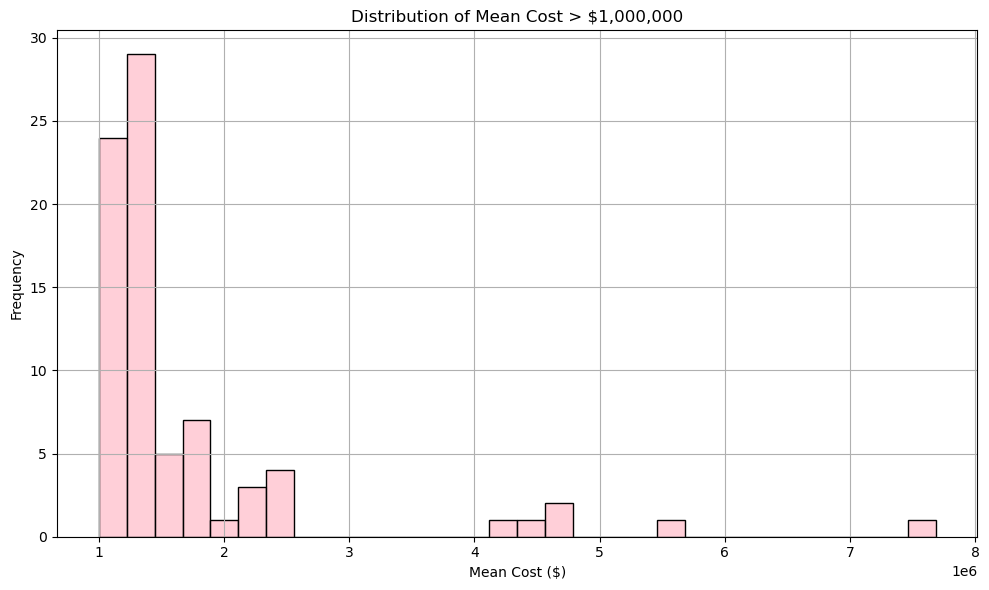

In [15]:
high_cost = df[df['Mean Cost'] > 1_000_000]['Mean Cost']

# Step 2: Plot histogram for high-cost cases
plt.figure(figsize=(10,6))
sns.histplot(high_cost, bins=30, color='Pink', edgecolor='black') 

plt.xlabel('Mean Cost ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Cost > $1,000,000')
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the observation of data, we found there are around 100 **Extremely Expensive Cost** that are over 1 million. These extreme outlier could create negative impact on model 

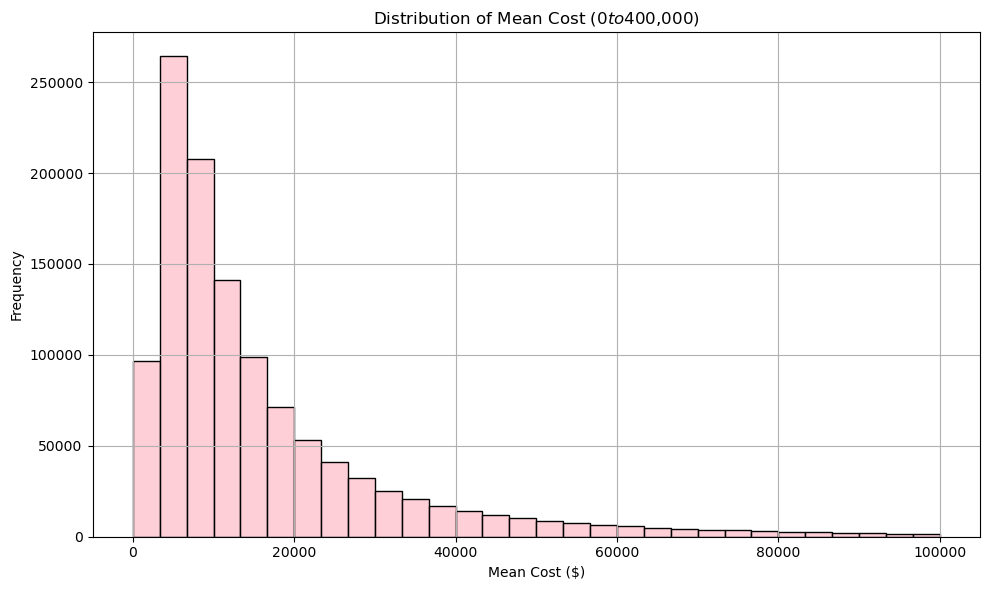

In [16]:
filtered_cost = df[(df['Mean Cost'] > 0) & (df['Mean Cost'] <= 100_000)]['Mean Cost']

plt.figure(figsize=(10,6))
sns.histplot(filtered_cost, bins=30, color='Pink', edgecolor='black') 

plt.xlabel('Mean Cost ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Cost ($0 to $400,000)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Normalize `mean cost`

### Log Transformation

In [17]:
df['log_mean_cost'] = np.log1p(df['Mean Cost'])

### Winsorization

- Based on our research, in the healthcare field, treatment costs exceeding **$100,000** are typically considered high-cost cases.  
- These rare but extreme cases would **significant decrease** our overall model performance.  
- Therefore, we chose to **sacrifice** some accuracy on extremely-high mean cost in order to improve the model's overall **robustness** and **stability**. 
 
We applied **Winsorization** by capping the Mean Cost at $400,000. (Capped 0.08% of overall observation)

In [18]:
cap_value = 400_000
df['Mean Cost W'] = np.where(df['Mean Cost'] > cap_value, cap_value, df['Mean Cost'])


num_capped = (df['Mean Cost'] > cap_value).sum()
total = len(df)
print(f"Capped {num_capped} out of {total} records ({num_capped/total:.2%}) at ${cap_value}")


Capped 966 out of 1192267 records (0.08%) at $400000


### High Cost Flag

In order to compensate for the high cost cases. We decided to add a High Cost Flag to the cases over 100,000$ Cost (2%).

In [19]:
print((df['Mean Cost'] > 100_000).mean())
df['High Cost Flag'] = (df['Mean Cost'] > 100_000).astype(int)

0.02078309640374178


In [20]:
df['Yes Surgical'] = df['APR Medical Surgical Code'].map({'M': 0, 'P': 1})


## Heat Maps

### Overall Heatmap

We first tried to make a heat map over all numerical variables

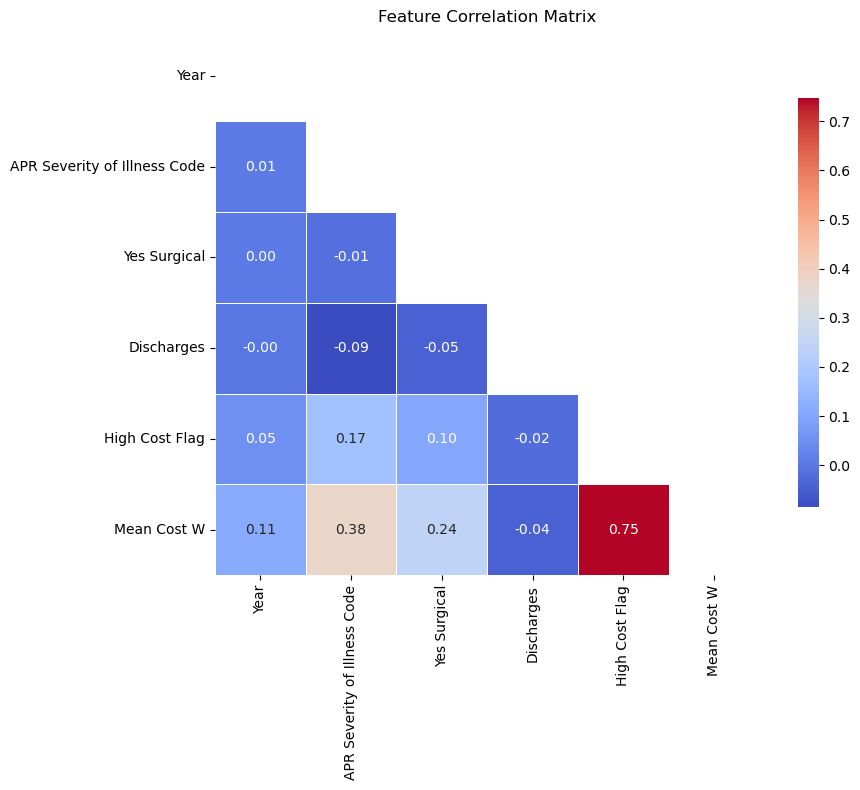

In [21]:
selected_cols = [
    'Year', 
    'APR Severity of Illness Code', 
    'Yes Surgical', 
    'Discharges', 
    'High Cost Flag', 
    'Mean Cost W',
]

corr = df[selected_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={"shrink": .75})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


From the map above, we still observed high cost flag are taking dominant role in correlation.

Therefore, we decided to make seperate model on predicting normal cost and high costs.

### Cost Seperated Heap Map

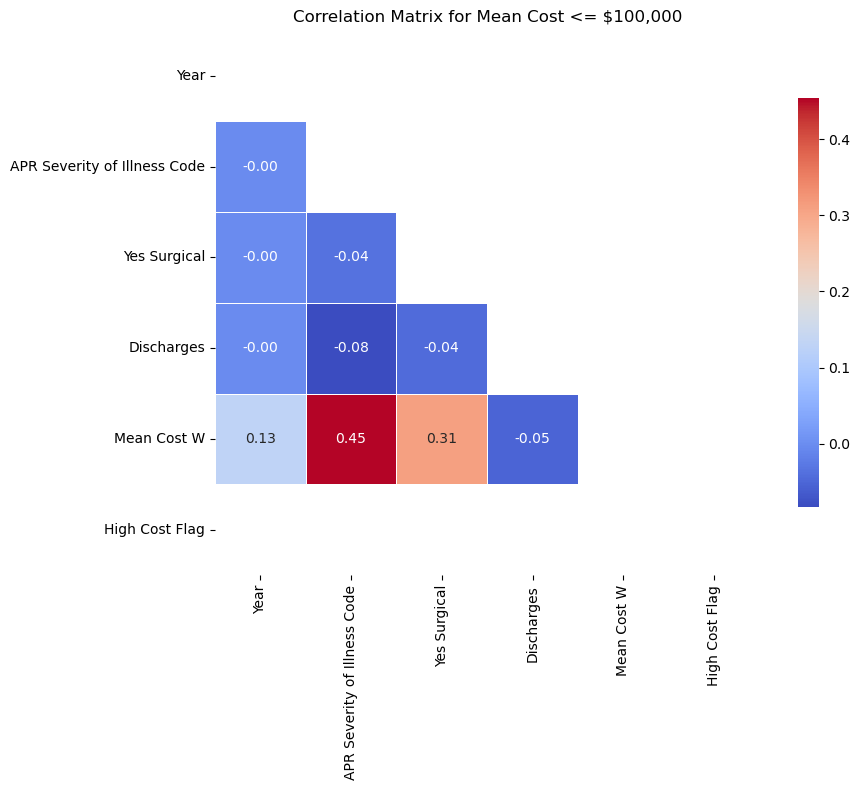

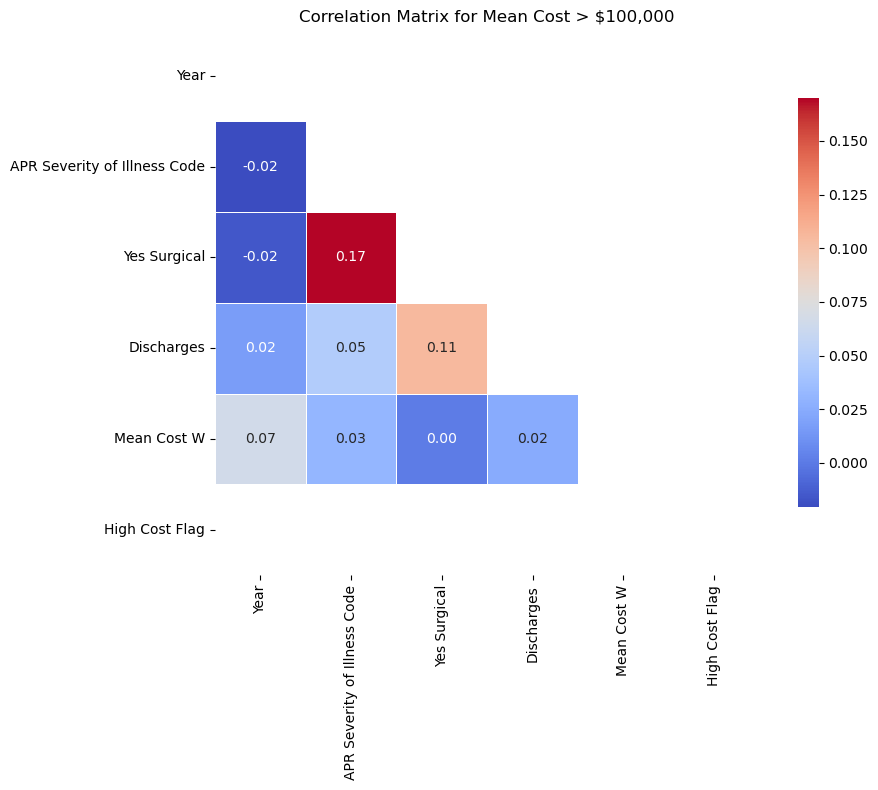

In [22]:
selected_cols = [
    'Year',   
    'APR Severity of Illness Code', 
    'Yes Surgical',
    'Discharges', 
    'Mean Cost W', 
    'High Cost Flag'
]

df_low_cost = df[df['High Cost Flag'] == 0][selected_cols]
df_high_cost = df[df['High Cost Flag'] == 1][selected_cols]

corr_low = df_low_cost.corr()
corr_high = df_high_cost.corr()

mask = np.triu(np.ones_like(corr_low, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(corr_low, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix for Mean Cost <= $100,000')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(corr_high, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix for Mean Cost > $100,000')
plt.tight_layout()
plt.show()

From the first plot above, we noticed that for Low Mean Cost group. There are some correlation between all the variables included except discharges. 

From the second plot above, we still can't see any correlation between predictors and outcome. Therefore, we decided to create separate model for high cost forcasting.

## Categorical Variables

### Dimensionality reduction and Target Encoding

Another problem we encountered during model training was that the  `APR DRG Code` feature had 349 unique values and `Facility Id` had 233 unique valyes.

These are unordered categorical features, and the numerical size is meaningless. Direct One-Hot will generate many columns, which are very sparse and inefficient.

This caused significant issues in tree-based models such as Random Forest and XGBoost, leading to slower training and potential overfitting.

To address this, we decided to apply Target Encoding with Smoothing.

$$
\text{Encoded value} = \frac{\mu_g \times \lambda + \mu_c \times n}{\lambda + n}
$$

where:
- $\mu_g$ = Global mean of the target
- $\mu_c$ = Mean of the target for the given category
- $n$ = Number of samples in the category
- $\lambda$ = Smoothing weight (hyperparameter)

**Formula Explanation**

- For categories with **large sample sizes** ($n$ large), the encoded value **leans towards the category mean** ($\mu_c$).
- For categories with **small sample sizes** ($n$ small), the encoded value **leans towards the global mean** ($\mu_g$), thus **reducing variance** caused by random noise.
  

**Implementation Detail:**


Prevent data leackage with 5-fold cross validation.

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def target_encode(df, cat_col, target_col='Mean Cost', smoothing_weights=[1]):

    df_encoded = df.copy()

    df_low_cost = df_encoded[df_encoded[target_col] < 100000].copy()

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    global_mean = df_low_cost[target_col].mean()

    for smoothing_weight in smoothing_weights:
        print(f"'{cat_col}', smoothing_weight = {smoothing_weight}")

        temp_col = np.nan * np.ones(len(df_encoded))
        fold_errors = [] 

        for train_idx, val_idx in kf.split(df_low_cost):
            train_fold = df_low_cost.iloc[train_idx]
            val_fold = df_low_cost.iloc[val_idx]

            stats = train_fold.groupby(cat_col)[target_col].agg(['mean', 'count'])
            mu_c = stats['mean']
            n = stats['count']

            smoothing = (global_mean * smoothing_weight + mu_c * n) / (smoothing_weight + n)

            encoded_val = val_fold[cat_col].map(smoothing)
            temp_col[val_fold.index] = encoded_val

            true_y = val_fold[target_col]
            pred_y = encoded_val.fillna(global_mean)
            rmse = np.sqrt(mean_squared_error(true_y, pred_y))
            fold_errors.append(rmse)

        temp_col = pd.Series(temp_col)
        temp_col = temp_col.fillna(global_mean)

        df[cat_col + ' Encoded'] = temp_col

        avg_rmse = np.mean(fold_errors)
        print(f"Avg RMSE for smoothing_weight={smoothing_weight}: {avg_rmse:.2f}")

    return df


In [24]:

df = target_encode(df, cat_col='APR DRG Code', smoothing_weights=[1, 5, 10])

df = target_encode(df, cat_col='Facility Id', smoothing_weights=[1, 5, 10])


'APR DRG Code', smoothing_weight = 1
Avg RMSE for smoothing_weight=1: 13737.69
'APR DRG Code', smoothing_weight = 5
Avg RMSE for smoothing_weight=5: 13738.76
'APR DRG Code', smoothing_weight = 10
Avg RMSE for smoothing_weight=10: 13740.43
'Facility Id', smoothing_weight = 1
Avg RMSE for smoothing_weight=1: 15150.49
'Facility Id', smoothing_weight = 5
Avg RMSE for smoothing_weight=5: 15150.51
'Facility Id', smoothing_weight = 10
Avg RMSE for smoothing_weight=10: 15150.59


In [25]:
df.dtypes

Year                              int64
Facility Id                       int64
APR DRG Code                      int64
APR Severity of Illness Code      int64
APR Medical Surgical Code        object
Discharges                      float64
Mean Charge                     float64
Median Charge                   float64
Mean Cost                       float64
Median Cost                     float64
log_mean_cost                   float64
Mean Cost W                     float64
High Cost Flag                    int64
Yes Surgical                      int64
APR DRG Code Encoded            float64
Facility Id Encoded             float64
dtype: object

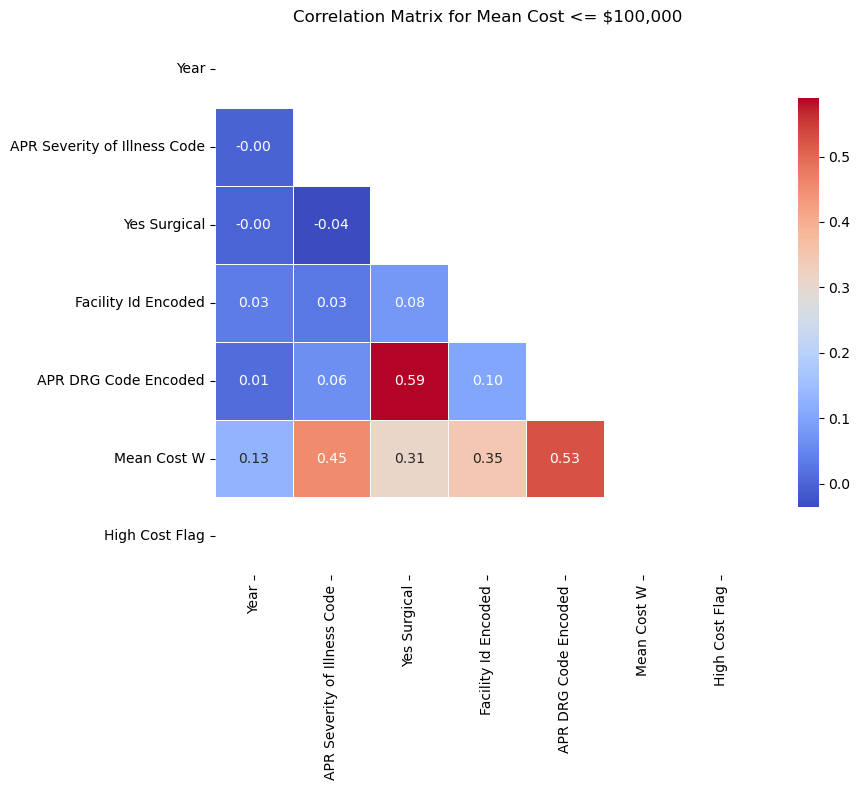

In [26]:
selected_cols = [
    'Year',   
    'APR Severity of Illness Code', 
    'Yes Surgical', 
    'Facility Id Encoded',
    'APR DRG Code Encoded',
    'Mean Cost W',   
    'High Cost Flag'
]

df_low_cost = df[df['High Cost Flag'] == 0][selected_cols]

corr_low = df_low_cost.corr()
corr_high = df_high_cost.corr()

mask = np.triu(np.ones_like(corr_low, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(corr_low, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix for Mean Cost <= $100,000')
plt.tight_layout()
plt.show()

## Feature Interaction

| Feature Interaction | Meaning | Relation to Mean Cost |
|:---|:---|:---|
| Severity × Facility | Different hospital management of high-severity patients | Different hospitals allocate resources (money) differently for severe cases. |
| Severity × DRG | Disease category combined with severity level | The same disease can have very different cost requirements at different severity level. |
| Facility × DRG | Hospital-specific treatment of certain disease categories | Different hospitals have different budget for treating specific DRGs. |
| Surgical × DRG | Surgical procedure involvement across disease categories | Surgical cases generally incur higher costs than medical cases, and the impact varies by disease category. |
| Year × Facility | Hospital cost trends over years | Costs within the same hospital can change over years due to inflation, policy changes, or technological advancements. |


In [32]:
df['Severity_x_Facility'] = df['APR Severity of Illness Code'] * df['Facility Id Encoded']
df['Severity_x_DRG'] = df['APR Severity of Illness Code'] * df['APR DRG Code Encoded']
df['Facility_x_DRG'] = df['Facility Id Encoded'] * df['APR DRG Code Encoded']
df['Surgical_x_DRG'] = df['Yes Surgical'] * df['APR DRG Code Encoded']
df['Year_x_Facility'] = df['Year'] * df['Facility Id Encoded']

In [33]:
interaction_cols = [
    'Severity_x_Facility',
    'Severity_x_DRG',
    'Facility_x_DRG',
    'Surgical_x_DRG',
    'Year_x_Facility'
]

correlations = {}
for col in interaction_cols:
    corr = df[col].corr(df['Mean Cost W'])
    correlations[col] = corr

for col, corr in correlations.items():
    print(f"Correlation between {col} and Mean Cost W: {corr:.4f}")


Correlation between Severity_x_Facility and Mean Cost W: 0.4133
Correlation between Severity_x_DRG and Mean Cost W: 0.4450
Correlation between Facility_x_DRG and Mean Cost W: 0.3287
Correlation between Surgical_x_DRG and Mean Cost W: 0.2528
Correlation between Year_x_Facility and Mean Cost W: 0.1920


### Interaction Feature Observations

We noticed that the first three interaction features exhibit relatively strong correlations with `Mean Cost W`:

- **Severity × Facility** (correlation = 0.4133)  
- **Severity × DRG** (correlation = 0.4450)  
- **Facility × DRG** (correlation = 0.3287)

These results suggest that combining patient severity levels with hospital identity and diagnostic categories introduces meaningful information about cost variations.  

Such interactions likely capture underlying patterns where clinical complexity and institutional differences jointly influence healthcare expenses.

We decided to retain these interaction features for model training and further analysis.


In [34]:
df = df.drop(columns=['Surgical_x_DRG', 'Year_x_Facility'])

In [35]:
print(df.dtypes)

Year                              int64
Facility Id                       int64
APR DRG Code                      int64
APR Severity of Illness Code      int64
APR Medical Surgical Code        object
Discharges                      float64
Mean Charge                     float64
Median Charge                   float64
Mean Cost                       float64
Median Cost                     float64
log_mean_cost                   float64
Mean Cost W                     float64
High Cost Flag                    int64
Yes Surgical                      int64
APR DRG Code Encoded            float64
Facility Id Encoded             float64
Severity_x_Facility             float64
Severity_x_DRG                  float64
Facility_x_DRG                  float64
dtype: object


### Categorical Convertion

Finally Convert `APR Severity of Illness Code`, `High Cost Flag` and `Yes Surgical` back to categorical for model understanding.

In [37]:
df['APR Severity of Illness Code'] = df['APR Severity of Illness Code'].astype('category')
df['High Cost Flag'] = df['High Cost Flag'].astype('category')
df['Yes Surgical'] = df['Yes Surgical'].astype('category')

In [38]:
print(df.dtypes)

Year                               int64
Facility Id                        int64
APR DRG Code                       int64
APR Severity of Illness Code    category
APR Medical Surgical Code         object
Discharges                       float64
Mean Charge                      float64
Median Charge                    float64
Mean Cost                        float64
Median Cost                      float64
log_mean_cost                    float64
Mean Cost W                      float64
High Cost Flag                  category
Yes Surgical                    category
APR DRG Code Encoded             float64
Facility Id Encoded              float64
Severity_x_Facility              float64
Severity_x_DRG                   float64
Facility_x_DRG                   float64
dtype: object


## Final Code Export

In [ ]:
df.to_csv('eda_hospital.csv', index=False)